In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [37]:
cwd = Path.cwd().parent
phpi_path = cwd / 'data' / 'redfin_metro_market_tracker.csv'

df = pd.read_csv(phpi_path)

df.shape

# convert date columns
df["PERIOD_BEGIN"] = pd.to_datetime(df["PERIOD_BEGIN"])
df["PERIOD_END"] = pd.to_datetime(df["PERIOD_END"])
df["LAST_UPDATED"] = pd.to_datetime(df["LAST_UPDATED"], errors="coerce")

# dropping useless columns
df = df.drop(columns=["CITY", "STATE"])

# handling missing values
df = df.dropna(subset=["MEDIAN_SALE_PRICE", "REGION"])

# cleaning region strings
df["REGION"] = df["REGION"].str.replace(" metro area", "", regex=False).str.strip()

print(df["PROPERTY_TYPE"].value_counts())
print(df.describe())

PROPERTY_TYPE
All Residential              155711
Single Family Residential    155625
Condo/Co-op                   86707
Multi-Family (2-4 Unit)       85379
Townhouse                     69333
Name: count, dtype: int64
                        PERIOD_BEGIN                     PERIOD_END  \
count                         552755                         552755   
mean   2019-03-08 12:41:03.335112448  2019-04-06 23:22:18.067679488   
min              2012-01-01 00:00:00            2012-01-31 00:00:00   
25%              2015-12-01 00:00:00            2015-12-31 00:00:00   
50%              2019-04-01 00:00:00            2019-04-30 00:00:00   
75%              2022-07-01 00:00:00            2022-07-31 00:00:00   
max              2025-10-01 00:00:00            2025-10-31 00:00:00   
std                              NaN                            NaN   

       PERIOD_DURATION  REGION_TYPE_ID       TABLE_ID  PROPERTY_TYPE_ID  \
count         552755.0        552755.0  552755.000000     552755.

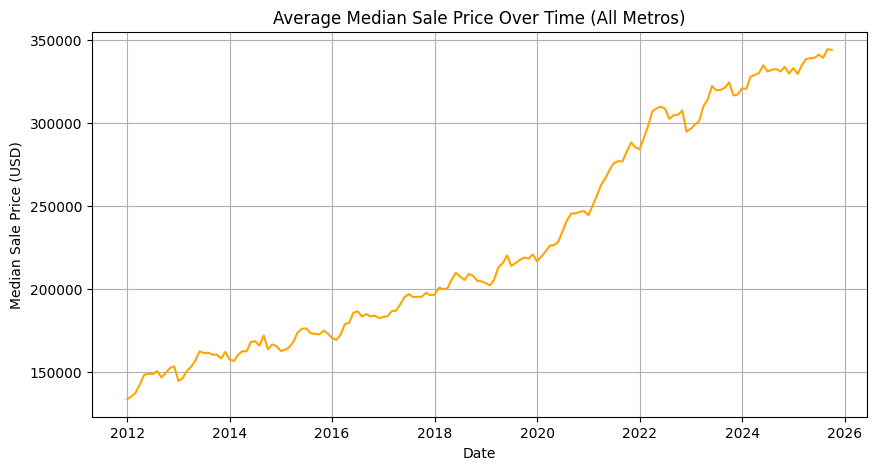

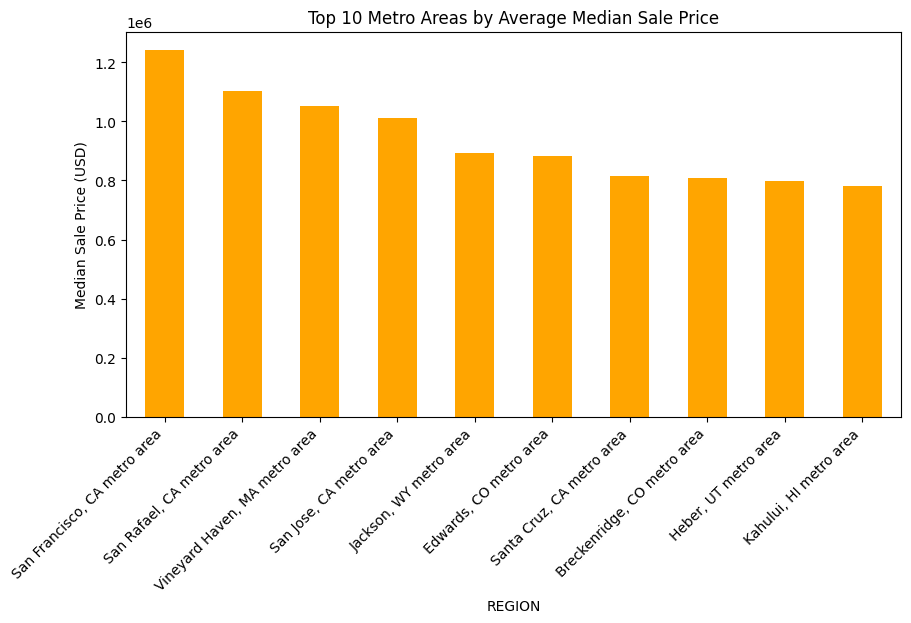

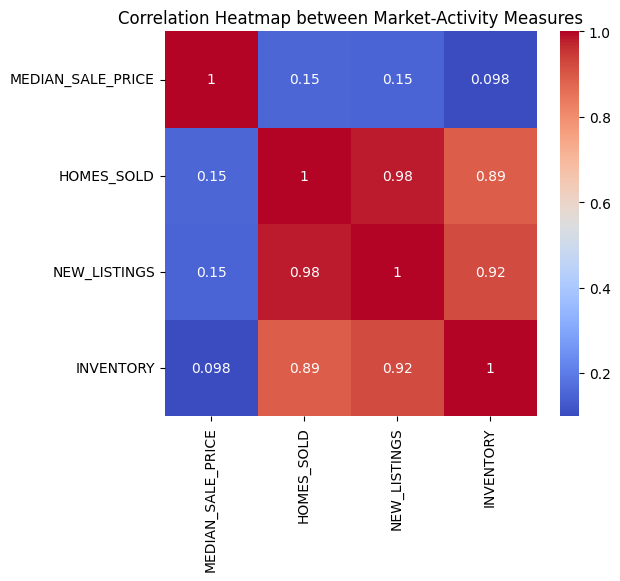

In [38]:
cwd = Path.cwd().parent
data_path = cwd / 'data' / 'redfin_metro_market_tracker.csv'

data = pd.read_csv(data_path)

# data cleaning
data["PERIOD_BEGIN"] = pd.to_datetime(data["PERIOD_BEGIN"], errors="coerce")
data = data.drop(columns=["CITY", "STATE"], errors="ignore")
data = data.dropna(subset=["MEDIAN_SALE_PRICE", "REGION"])

# price trend over time
avg_price = data.groupby("PERIOD_BEGIN")["MEDIAN_SALE_PRICE"].mean()

plt.figure(figsize=(10,5))
plt.plot(avg_price.index, avg_price.values, color="orange")
plt.title("Average Median Sale Price Over Time (All Metros)")
plt.xlabel("Date")
plt.ylabel("Median Sale Price (USD)")
plt.grid(True)
plt.show()

# top 10 metro areas by price
top10 = (data.groupby("REGION")["MEDIAN_SALE_PRICE"]
          .mean()
          .sort_values(ascending=False)
          .head(10))

plt.figure(figsize=(10,5))
top10.plot(kind="bar", color="orange")
plt.title("Top 10 Metro Areas by Average Median Sale Price")
plt.ylabel("Median Sale Price (USD)")
plt.xticks(rotation=45, ha="right")
plt.show()

# correlation heatmap
cols = ["MEDIAN_SALE_PRICE", "HOMES_SOLD", "NEW_LISTINGS", "INVENTORY"]
corr = data[cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap between Market-Activity Measures")
plt.show()